In [1]:
#!pip install nb_black

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data_path = "data/vgsales.csv"
vg_sales = pd.read_csv(data_path)

<IPython.core.display.Javascript object>

For inflation, I’m sure there’s a table out there of price levels paired with their years, then just divide the price by the price level in your table



Possible research questions

    1. Is there a significant difference in the average number of units sold for different genres of games in NA in the 2000's and 2010's?
    2. Is there a significant difference in the average number of units sold per game in the 2000's than in 2010?
    3. Is there a relationship between 

Variables I want
* 

In [20]:
vg_sales.info()
vg_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16086 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16086 non-null  int64  
 1   Name          16086 non-null  object 
 2   Platform      16086 non-null  object 
 3   Year          16086 non-null  float64
 4   Genre         16086 non-null  object 
 5   Publisher     16086 non-null  object 
 6   NA_Sales      16086 non-null  float64
 7   EU_Sales      16086 non-null  float64
 8   JP_Sales      16086 non-null  float64
 9   Other_Sales   16086 non-null  float64
 10  Global_Sales  16086 non-null  float64
 11  decade        16086 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 2.2+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,00s


<IPython.core.display.Javascript object>

In [5]:
vg_sales = vg_sales.dropna()

<IPython.core.display.Javascript object>

In [6]:
eighties = list(range(1980, 1990))
nineties = list(range(1990, 2000))
oughts = list(range(2000, 2010))
tens = list(range(2010, 2020))
twenties = list(range(2020, 2030))

vg_sales["decade"] = "80s"
vg_sales.loc[vg_sales["Year"].isin(nineties), "decade"] = "90s"
vg_sales.loc[vg_sales["Year"].isin(oughts), "decade"] = "00s"
vg_sales.loc[vg_sales["Year"].isin(tens), "decade"] = "10s"
vg_sales.loc[vg_sales["Year"].isin(twenties), "decade"] = "20s"

<IPython.core.display.Javascript object>

In [58]:
# we are going to analyze from 2000's onward, as this is when modern gaming markets matured
# also throw out 2020 as there is only 1 game
# see https://learn.stash.com/defining-moments-in-video-game-history-a-timeline

vg_sales = vg_sales[vg_sales["decade"] != "80s"]
vg_sales = vg_sales[vg_sales["decade"] != "20s"]
vg_sales = vg_sales[vg_sales["decade"] != "90s"]

vg_sales.decade.value_counts()

00s    9183
10s    5133
Name: decade, dtype: int64

<IPython.core.display.Javascript object>

In [63]:
vg_sales.Genre.value_counts()

Action          3023
Sports          1977
Misc            1562
Role-Playing    1289
Adventure       1175
Shooter         1115
Racing          1034
Simulation       758
Platform         717
Fighting         639
Strategy         547
Puzzle           480
Name: Genre, dtype: int64

<IPython.core.display.Javascript object>

In [64]:
# separate based on genres.
sports = vg_sales[vg_sales["Genre"] == "Sports"]
action = vg_sales[vg_sales["Genre"] == "Action"]
misc = vg_sales[vg_sales["Genre"] == "Misc"]
rpg = vg_sales[vg_sales["Genre"] == "Role-Playing"]
adventure = vg_sales[vg_sales["Genre"] == "Adevnture"]
shooter = vg_sales[vg_sales["Genre"] == "Shooter"]
racing = vg_sales[vg_sales["Genre"] == "Racing"]
sim = vg_sales[vg_sales["Genre"] == "Simulation"]
platform = vg_sales[vg_sales["Genre"] == "Platform"]
fighting = vg_sales[vg_sales["Genre"] == "Fighting"]
startegy = vg_sales[vg_sales["Genre"] == "Strategy"]
puzzle = vg_sales[vg_sales["Genre"] == "Puzzle"]

<IPython.core.display.Javascript object>

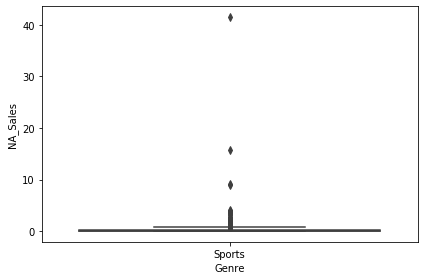

<IPython.core.display.Javascript object>

In [65]:
sns.boxplot("Genre", "NA_Sales", data=sports)
plt.tight_layout()
plt.show()
# wii sports shipped with the wii console, and is not representative of games that sell normally.
# It shipped with the wii, and it is already clear how we can learn from it's success: accessibility.
# https://www.gamespot.com/articles/the-most-influential-games-of-the-21st-century-wii/1100-6466810/#:~:text=Like%20the%20Wii%2C%20it%20focused,the%20industry%20would%20approach%20accessibility.
# it also a outlier amongst outliers. I will be tossing it

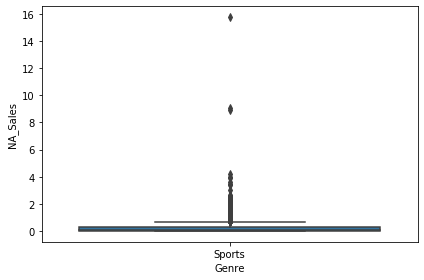

<IPython.core.display.Javascript object>

In [66]:
sports = sports[sports["Name"] != "Wii Sports"]
sns.boxplot("Genre", "NA_Sales", data=sports)
plt.tight_layout()
plt.show()
# removal of wii sports cuts the skew dramtically

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>